In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
from sklearn.datasets import load_boston

In [4]:
X, y = load_boston(return_X_y=True)

**1. Create train and test sets**

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123, train_size=0.8)

**2. Train a model**

In [23]:
from sklearn.linear_model import LinearRegression # Choose the hypothesis space

In [30]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train);  # Solves evaluation + optimization

In [32]:
lr.coef_

array([-9.87931696e-02,  4.75027102e-02,  6.69491841e-02,  1.26954150e+00,
       -1.54697747e+01,  4.31968412e+00, -9.80167937e-04, -1.36597953e+00,
        2.84521838e-01, -1.27533606e-02, -9.13487599e-01,  7.22553507e-03,
       -5.43790245e-01])

In [33]:
lr.intercept_

31.835164121206386

In [35]:
y_pred = lr.predict(X_test) # Coefficients * X_test + intercept_

In [44]:
1-sum((y_pred-y_test)**2)/sum((y_test-np.mean(y_test))**2) # R^2

0.6592466510354096

In [39]:
lr.score(X_test, y_test)

0.6592466510354097

In [45]:
from sklearn.metrics import mean_squared_error  # Use different metrics

In [46]:
mean_squared_error(y_true=y_test, y_pred=y_pred)

28.192485758469548

**3. Assume we are happy with this model...**

In [47]:
lr.fit(X,y) # final model, trained on everything

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
import pickle

In [57]:
pickle.dump(lr, open('first_model.pkl', 'wb')) 

In [58]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [59]:
lr2 = LinearRegression()

In [60]:
lr2.coef_ = lr.coef_

In [61]:
lr2.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

# Preprocessing

In [68]:
X_train[0,:]

array([3.5100e-02, 9.5000e+01, 2.6800e+00, 0.0000e+00, 4.1610e-01,
       7.8530e+00, 3.3200e+01, 5.1180e+00, 4.0000e+00, 2.2400e+02,
       1.4700e+01, 3.9278e+02, 3.8100e+00])

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [64]:
scl = StandardScaler()

In [65]:
X_train_scl = scl.fit_transform(X_train)

In [73]:
# Train model as before... 
lr.fit(X_train_scl, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Transformation needs to be applied to `X_test`.

In [74]:
X_test_scl = scl.transform(X_test)

In [77]:
lr.score(X_test_scl, y_test)

0.6592466510354096

## Pipelines

In [78]:
from sklearn.pipeline import make_pipeline

In [79]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

In [80]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [82]:
y_pred = pipe.predict(X_test)

In [85]:
pipe.score(X_test,y_test)

0.6592466510354096

## A visual sanity check - Parity plot

In [86]:
minval = min(min(y_pred), min(y_test))
maxval = max(max(y_pred), max(y_test))

In [87]:
mesh = np.linspace(minval, maxval, 100)

Text(0.5, 1.0, 'Parity plot')

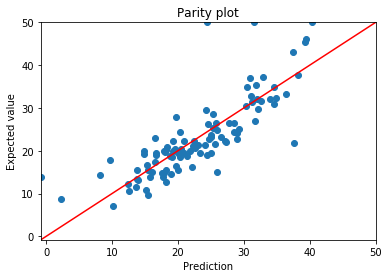

In [90]:
plt.scatter(y_pred, y_test)
plt.xlim(minval, maxval)
plt.xlabel('Prediction')
plt.ylim(minval, maxval)
plt.ylabel('Expected value')
plt.plot(mesh, mesh, 'r')
plt.title('Parity plot')

## Learning curve

In [91]:
from sklearn.model_selection import learning_curve

In [93]:
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=5)

In [95]:
train_scores

array([[0.93243852, 0.85257547, 0.85257547, 0.85257547, 0.85257547],
       [0.80859954, 0.77881858, 0.79846077, 0.79846077, 0.79846077],
       [0.79499357, 0.76683807, 0.78249651, 0.80602278, 0.80602278],
       [0.767052  , 0.74754989, 0.75226763, 0.76974936, 0.78757383],
       [0.76126296, 0.74208415, 0.75055073, 0.75838387, 0.77880123]])

In [97]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_mean

array([0.86854808, 0.79656008, 0.79127474, 0.76483854, 0.75821659])

In [98]:
train_sizes

array([ 32, 104, 177, 250, 323])

In [99]:
test_scores_mean = np.mean(test_scores, axis=1)

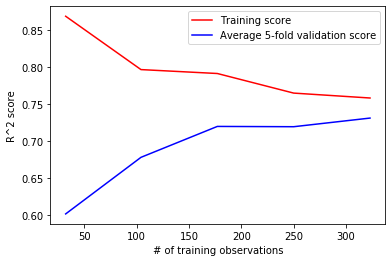

In [101]:
plt.plot(train_sizes, train_scores_mean, label='Training score', color='r') # Training score
plt.plot(train_sizes, test_scores_mean, label='Average 5-fold validation score', color='b') # Test score
plt.xlabel('# of training observations')
plt.ylabel('R^2 score')
plt.legend(loc='best')

## Add polynomial features

In [102]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
polynomial_pipe = make_pipeline(PolynomialFeatures(degree=2), MinMaxScaler(), LinearRegression())

In [114]:
polynomial_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [115]:
polynomial_pipe.score(X_test, y_test)

0.8248574882000355

In [116]:
train_sizes, train_scores, test_scores = learning_curve(polynomial_pipe, X_train, y_train, cv=5)

In [117]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

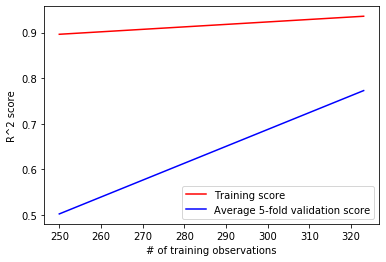

In [129]:
plt.plot(train_sizes[3:], train_scores_mean[3:], label='Training score', color='r') # Training score
plt.plot(train_sizes[3:], test_scores_mean[3:], label='Average 5-fold validation score', color='b') # Test score
plt.xlabel('# of training observations')
plt.ylabel('R^2 score')
plt.legend(loc='best')

In [125]:
X_train_pol = PolynomialFeatures().fit_transform(X_train)

In [126]:
X_train_pol.shape

(404, 105)

In [122]:
test_scores

array([[ 3.96715773e-01, -1.39101262e-01, -1.57581773e+01,
         1.00594490e-01, -8.22117624e+01],
       [-2.55863489e+00, -5.20141357e+01, -7.04364383e+01,
        -9.99765538e-01, -5.75972919e+02],
       [ 5.57970466e-01,  7.35716453e-01,  3.30630146e-01,
         5.66483987e-01, -2.05108626e+01],
       [ 7.91914150e-01,  6.78863095e-01, -1.58232242e-01,
         7.40889172e-01,  4.59043168e-01],
       [ 7.89588167e-01,  8.48379497e-01,  8.62826338e-01,
         8.77044376e-01,  4.85994541e-01]])

In [119]:
y_pred = polynomial_pipe.predict(X_test)

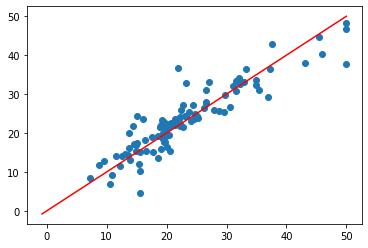

In [127]:
plt.scatter(y_test, y_pred)
plt.plot(mesh, mesh, 'r')